In [38]:
## Should have all the same signal processing functions from the signal package in R:
## https://cran.r-project.org/web/packages/signal/signal.pdf
from scipy.signal import butter, lfilter

## https://docs.scipy.org/doc/scipy/reference/signal.html

import pandas as pd
import numpy as np
import csv
import glob
import matplotlib.pyplot as plt
import datetime

In [39]:
file_path = r'/Users/dancohen/Dropbox/E4 stuff/test data'
output_path = r'/Users/dancohen/Dropbox/E4 stuff/test data/HR_All_Data'
all_folders = glob.glob(file_path + "/PRF*")

In [40]:
def iterate_sample_rate(df_length, fs):
    # returns list of floats starting from zero iterated upward by sample rate
    result = []
    curr_time = 0.0
    result.append(curr_time)
    
    for i in range(df_length-1):
        curr_time += 1.0/fs
        result.append(curr_time)
    return result

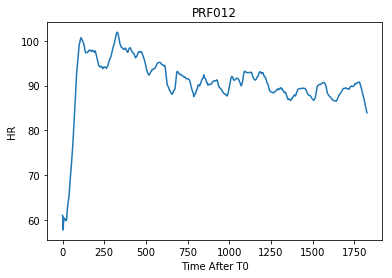

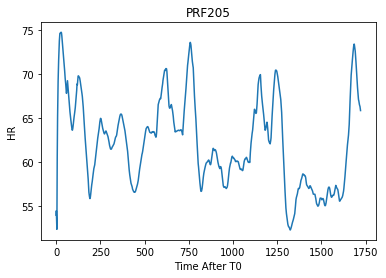

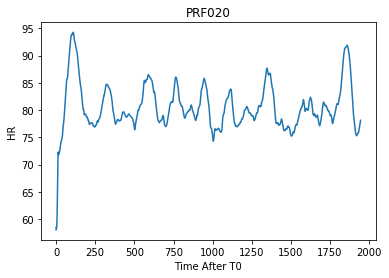

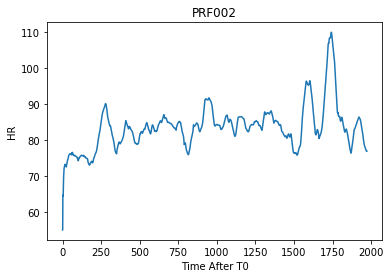

In [45]:
hr_all_part = []
for folder in all_folders:
    spl = folder.split('/')
    
    #Folder names are 'PRF###' (participant ID) and we are interested in the ID
    part_id = spl[len(spl)-1][3:]
    
    hr_df_raw = pd.read_csv(folder+"/HR.csv")
    starting_timestamp = hr_df_raw.columns[0]
    sample_rate = hr_df_raw[starting_timestamp][0]
    hr_df_raw = hr_df_raw.drop([0, 0])
    time_col = iterate_sample_rate(len(hr_df_raw), sample_rate)
    hr_df = hr_df_raw.copy()
    hr_df['Timestamp'] = time_col
    hr_df = hr_df.rename(columns={starting_timestamp: part_id})
    hr_df = hr_df.set_index('Timestamp')
    
    plt.plot(time_col, hr_df[part_id] )
    plt.title("PRF{}".format(part_id))
    plt.ylabel('HR')
    plt.xlabel('Time After T0')
    plt.savefig(output_path+"/HR{}.pdf".format(part_id))
    plt.show()
    
    hr_all_part.append(hr_df)

In [42]:
result = pd.concat(hr_all_part, axis=1)
result

,012,205,020,002
Timestamp,,,,
0.0,61.00,54.00,58.00,55.00
1.0,60.50,54.50,58.50,55.00
2.0,60.67,53.67,58.33,64.67
3.0,57.75,52.75,58.50,64.50
4.0,58.40,52.40,58.80,64.40
5.0,58.83,57.33,59.83,66.67
6.0,59.43,60.57,60.71,68.57
7.0,60.00,63.25,62.75,69.75
8.0,60.11,65.11,65.00,70.67


In [43]:
result.to_csv(output_path+"/HR_All_Data.csv", float_format='%.6f')